In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
df = df.drop(labels="id", axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.duplicated().sum()

0

In [7]:
# segregate numerical and categorical column
numerical_column = df.columns[df.dtypes!='object']
categorical_column = df.columns[df.dtypes=='object']
numerical_column,categorical_column

(Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [8]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [9]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/

In [10]:
cut_map = {'Fair':4, 'Good':3, 'Very Good':2, 'Premium':1,'Ideal':0}

In [11]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [12]:
color_map = {'D':0,'E':0.5,'F':1,'G':1.5,'H':2,'I':2.5,'J':3}

In [13]:
df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [14]:
clarity_map = {'IF':0, 'VVS1':1,'VVS2':2,'VS1':3,'VS2':4,'SI1':5,'SI2':6,'I1':7}

In [15]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

<AxesSubplot: >

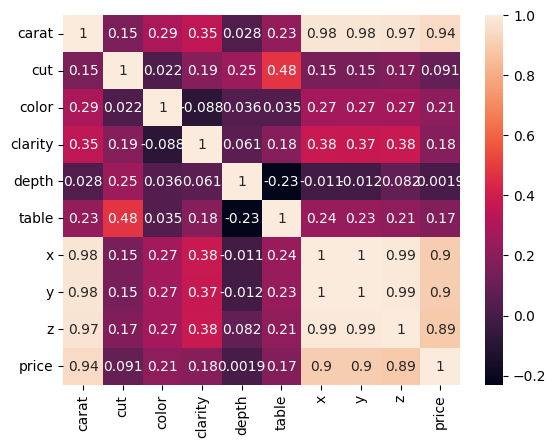

In [16]:
import seaborn as sns
sns.heatmap(data=df.corr(), annot=True)

In [17]:
# plt.figure(figsize=(8,9))

# for i in df.columns:
#     sns.histplot(data=df, x=i, kde=True)
#     print('\n')
#     plt.show()

In [18]:
X = df.drop(labels='price', axis=1)
Y = df[['price']]

In [19]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
pipelines= Pipeline(
   steps=[('imputer', SimpleImputer(strategy='median')),
         ('scaler', StandardScaler())]
)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [23]:
X_train = pd.DataFrame(pipelines.fit_transform(X_train), columns=pipelines.get_feature_names_out())
X_test = pd.DataFrame(pipelines.transform(X_test), columns=pipelines.get_feature_names_out())

In [24]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.542206,2.146783,-0.933319,-0.686007,2.112795,-1.684145,-0.455961,-0.544885,-0.354514
1,-0.153187,-0.873710,-0.317606,1.313723,0.447103,-1.163003,0.021706,0.053798,0.080569
2,1.575782,1.139952,-0.317606,0.647147,-2.143974,0.921565,1.652982,1.595862,1.356812
3,1.683842,-0.873710,1.529534,-2.685738,0.447103,-0.641861,1.562856,1.550507,1.588856
4,-0.844775,0.133121,-1.549032,-0.686007,1.094872,0.400423,-0.987703,-0.962150,-0.876613


In [25]:
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [26]:
models = {'LinearReg': LinearRegression(),
         'Lasso': Lasso(),
         'Ridge': Ridge()}

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true,predicted)
    
    return mae,rmse,r2

In [27]:
# Model Evaluation

trained_model = []
r2_score_train = []
r2_score_test = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)
    
    y_train_pred = model.predict(X_train)
    mae,rmse,score = evaluate_model(Y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    mae1, rmse1, score1 = evaluate_model(Y_test, y_test_pred)
    
    print(list(models.keys())[i])
    trained_model.append(list(models.keys())[i])
    
    print("Training performance: ")
    print("MAE:",mae)
    print("RMSE:",rmse)
    print("r2_score:",score*100)
    print("\nTest performance: ")
    print("MAE:",mae1)
    print("RMSE:",rmse1)
    print("r2_score:",score1*100)
    
    r2_score_train.append(score)
    r2_score_test.append(score1)
    
    print("-"*40)
    print('\n')

LinearReg
Training performance: 
MAE: 675.3264543268712
RMSE: 1014.6550615936221
r2_score: 93.67111571217606

 Test performance: 
MAE: 675.5483623703063
RMSE: 1015.7752655619771
r2_score: 93.67464279030936
----------------------------------------


Lasso
Training performance: 
MAE: 676.4921582069743
RMSE: 1014.7773865748665
r2_score: 93.66958962247716

 Test performance: 
MAE: 676.7039718295002
RMSE: 1015.9362869404231
r2_score: 93.67263723160035
----------------------------------------


Ridge
Training performance: 
MAE: 675.353163719666
RMSE: 1014.6551199038796
r2_score: 93.67111498475865

 Test performance: 
MAE: 675.5744982013298
RMSE: 1015.7758609839723
r2_score: 93.67463537477555
----------------------------------------




In [29]:
r2_score_test,r2_score_train

([0.9367464279030936, 0.9367263723160034, 0.9367463537477555],
 [0.9367111571217607, 0.9366958962247717, 0.9367111498475864])

In [30]:
trained_model

['LinearReg', 'Lasso', 'Ridge']

In [ ]:
X_train.head()

: 